<a href="https://colab.research.google.com/github/OlivierDataS/github_actions/blob/master/Projet_Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation de l'environnement - la première fois seulement !

In [ ]:
# For Python
# pip install pandas

# ORM for databases
# pip install sqlalchemy

#Python SQL Toolkit - SqlAlchemy installation
# pip install ipython-sql

# Visualisation GPS - via Conda
# !pip install matplotlib
# Geopandas et dépendances
# !pip install geopandas
# !pip install --upgrade pyshp
# !pip install --upgrade shapely
# !pip install --upgrade descartes


Activation de SqlMagic :

In [1]:
%load_ext sql
#%reload_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False
%config SqlMagic.displaylimit = 50
%config SqlMagic.autocommit=True

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Config option `displaycon` not recognized by `SqlMagic`.  Did you mean `displaylimit`?
  exec(code_obj, self.user_global_ns, self.user_ns)


Connection/creation à la BD/schema :

In [2]:
%sql sqlite:///Itineraires.db

'Connected: @Itineraires.db'

Load tools for Python :

In [72]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
#from sqlalchemy import create_engine, ForeignKey
#from sqlalchemy import Column, Date, Integer, String
#from sqlalchemy.ext.declarative import declarative_base
import sqlite3
conn = sqlite3.connect('Itineraires.db')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


=================================== Chargement des données des référentiels

Création de la table référentielle des villes :

In [4]:
%%sql
CREATE TABLE IF NOT EXISTS city_repository (
city_id INTEGER PRIMARY KEY AUTOINCREMENT,
nom_commune VARCHAR,
code_postal INTEGER NOT NULL,
Lieu_dit VARCHAR,
gps_latitude FLOAT,
gps_longitude FLOAT,
Date_maj TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

 * sqlite:///Itineraires.db


[]

Création de la table référentielle des catégories par hierarchies :

In [5]:
%%sql
CREATE TABLE IF NOT EXISTS activity_hierarchy (
activity_id INTEGER NOT NULL,
activity_name VARCHAR,
activity_to INTEGER, 
Date_maj TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

 * sqlite:///Itineraires.db


[]

Import des données "city" par l'intermédiaire d'un fichier puis d'un dataframe (correspondance des noms de colonnes) :

In [8]:
import_city_repository = pd.read_csv('/content/drive/MyDrive/CSV4DB/city_repository.csv')

In [9]:
import_city_repository.to_sql('city_repository', conn, if_exists='append', index=False)

Vérifications :

In [10]:
import_city_repository.count()

nom_commune      85
code_postal      85
Lieu_dit         61
gps_latitude     85
gps_longitude    85
dtype: int64

In [11]:
%%sql
SELECT COUNT(*) FROM city_repository

 * sqlite:///Itineraires.db


COUNT(*)
85


In [12]:
%%sql
SELECT * FROM city_repository
LIMIT 5

 * sqlite:///Itineraires.db


city_id,nom_commune,code_postal,Lieu_dit,gps_latitude,gps_longitude,Date_maj
1,ST DENIS,97490,BOIS DE NEFLES ST DENIS,-20.933029099,55.446977555,2023-02-24 10:49:24
2,ST DENIS,97490,ST DENIS CHAUDRON,-20.933029099,55.446977555,2023-02-24 10:49:24
3,ST DENIS,97490,LA BRETAGNE,-20.933029099,55.446977555,2023-02-24 10:49:24
4,ST DENIS,97490,MOUFIA,-20.933029099,55.446977555,2023-02-24 10:49:24
5,ST DENIS,97490,STE CLOTILDE,-20.933029099,55.446977555,2023-02-24 10:49:24


Import des données "activity" :

In [13]:
import_activity_hierarchy = pd.read_csv('/content/drive/MyDrive/CSV4DB/activity_hierarchy.csv')

In [17]:
import_activity_hierarchy.to_sql('activity_hierarchy', conn, if_exists='append', index=False)

Vérifications :

In [18]:
import_activity_hierarchy.count()

activity_id      252
activity_name    252
activity_to      251
dtype: int64

In [19]:

%%sql
SELECT COUNT(*) FROM activity_hierarchy

 * sqlite:///Itineraires.db


COUNT(*)
252


In [20]:
%%sql
SELECT * FROM activity_hierarchy
LIMIT 5

 * sqlite:///Itineraires.db


activity_id,activity_name,activity_to,Date_maj
1,PointOfInterest,None,2023-02-24 10:50:30
2,PlaceOfInterest,1,2023-02-24 10:50:30
3,ActivityProvider,2,2023-02-24 10:50:30
4,CulturalSite,2,2023-02-24 10:50:30
5,FoodEstablishment,2,2023-02-24 10:50:30


===================================
Chargement des données POI - les tables sont crées depuis leurs dataframes.

Dataframe/table du fichier reunion_clean.csv :

In [28]:
poi_reunion_clean = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_clean.csv')

In [29]:
%sql persist poi_reunion_clean

 * sqlite:///Itineraires.db


'Persisted poi_reunion_clean'

Vérifications :

In [30]:
poi_reunion_clean.count()

ID                     1750
Nom_du_POI             1750
Latitude               1750
Longitude              1750
Adresse_postale        1655
Date_de_mise_a_jour    1750
Contacts_du_POI        1655
Description              29
region                 1750
commune                1750
code_postal            1750
category_0             1743
category_1             1224
category_2               78
dtype: int64

In [31]:
%%sql
SELECT count(*) FROM poi_reunion_clean;

 * sqlite:///Itineraires.db


count(*)
1750


In [32]:
%%sql
SELECT * FROM poi_reunion_clean
LIMIT 5;

 * sqlite:///Itineraires.db


index,ID,Nom_du_POI,Latitude,Longitude,Adresse_postale,Date_de_mise_a_jour,Contacts_du_POI,Description,region,commune,code_postal,category_0,category_1,category_2
0,187a27ff-8ad2-3298-9b2f-064023dd042b,Lentille des Gourmets (La),-21.13588418,55.479501,"40 E, chemin des Trois Mares",2022-05-30,Lentille des Gourmets (La)#+33 2 62 31 85 85#hotel@lecilaos.re#http://leschenets-lecilaos.re/,None,54,Cilaos,97413,FoodEstablishment,Restaurant,None
1,ac5515a8-d78e-35ed-a51e-6fc6b1ddbb2b,Neptune (Le),-21.34144,55.462664,"117, boulevard Hubert Delisle",2021-07-13,Neptune (Le)#+33 2 62 61 61 61#reservation@lebattantdeslames.com#http://www.lebattantdeslames.com/,None,54,Saint-Pierre,97410,ActivityProvider,LeisureSportActivityProvider,None
2,43079596-c868-3cfe-a280-aeaf15d5666c,Grand Large (Le),-21.34144,55.462664,"117, boulevard Hubert Delisle",2021-07-13,Grand Large (Le)#+33 2 62 61 61 61#reservation@lebattantdeslames.com#http://www.lebattantdeslames.com/,None,54,Saint-Pierre,97410,FoodEstablishment,Restaurant,None
3,f2a140d5-152c-300b-accb-67619012a89a,Concorde (Le),-20.89625806,55.44723605,"91 bis, allée des Topazes - Bellepierre",2019-10-10,Concorde (Le)#+33 2 62 51 51 51#info@hotel-bellepierre.com#http://www.hotel-bellepierre.com/,None,54,Saint-Denis,97400,FoodEstablishment,Restaurant,ActivityProvider
4,9c77eb5d-8fd9-3700-8e77-e830870e9669,Jardin de la Maison d'Edith (Le),-20.889919,55.407147,"59, chemin Commins",2020-05-07,Jardin de la Maison d'Edith (Le)#+33 6 92 69 66 05#maisondedith@gmail.com#http://www.maisondedith.com/,None,54,Saint-Denis,97417,CulturalSite,None,None


Dataframe/table du fichier reunion_poi_2.csv :


In [33]:
poi_reunion_2 = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_poi_2.csv')

In [34]:
%sql persist poi_reunion_2

 * sqlite:///Itineraires.db


'Persisted poi_reunion_2'

Vérifications :

In [35]:
poi_reunion_2.count()

ID                     314
Nom_du_POI             314
Latitude               314
Longitude              314
Adresse_postale        227
Date_de_mise_a_jour    314
Contacts_du_POI        227
Description             28
region                 314
commune                314
code_postal            314
category_0             307
category_1             105
category_2              21
dtype: int64

In [36]:
%%sql
SELECT count(*) FROM poi_reunion_2;

 * sqlite:///Itineraires.db


count(*)
314


Dataframe/table du fichier reunion_activity.csv :

In [38]:
poi_reunion_activity = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_activity.csv')

In [ ]:
%sql persist poi_reunion_activity


 * sqlite:///Itineraires.db


'Persisted poi_reunion_activity'

Vérifications :

In [ ]:
poi_reunion_activity.count()

ID                     241
Nom_du_POI             241
Latitude               241
Longitude              241
Adresse_postale        233
Date_de_mise_a_jour    241
Contacts_du_POI        233
Description              1
region                 241
commune                241
code_postal            241
category_0             241
category_1             241
category_2               2
dtype: int64

In [39]:
%%sql
SELECT COUNT(*) FROM poi_reunion_activity

 * sqlite:///Itineraires.db
(sqlite3.OperationalError) no such table: poi_reunion_activity
[SQL: SELECT COUNT(*) FROM poi_reunion_activity]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


Dataframe/table du fichier reunion_coordonnees.csv :

In [41]:
poi_reunion_coordonnees = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_coordonnees.csv')

In [42]:
%%sql
persist poi_reunion_coordonnees

 * sqlite:///Itineraires.db


'Persisted poi_reunion_coordonnees'

Vérifications :

In [43]:
poi_reunion_coordonnees.count()

ID            1750
Nom_du_POI    1750
Latitude      1750
Longitude     1750
dtype: int64

In [44]:
%%sql
SELECT COUNT(*) FROM poi_reunion_coordonnees;

 * sqlite:///Itineraires.db


COUNT(*)
1750


Dataframe/table du fichier reunion_food.csv :

In [45]:
poi_reunion_food = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_food.csv')

In [46]:
%%sql
persist poi_reunion_food

 * sqlite:///Itineraires.db


'Persisted poi_reunion_food'

Vérifications

In [47]:
poi_reunion_food.count()

ID                     1195
Nom_du_POI             1195
Latitude               1195
Longitude              1195
Adresse_postale        1195
Date_de_mise_a_jour    1195
Contacts_du_POI        1195
Description               0
region                 1195
commune                1195
code_postal            1195
category_0             1195
category_1              878
category_2               55
dtype: int64

In [48]:
%%sql
SELECT COUNT(*) FROM poi_reunion_food;

 * sqlite:///Itineraires.db


COUNT(*)
1195


Dataframe/table du fichier reunion_ville_cp.csv :

In [49]:
poi_reunion_ville_cp = pd.read_csv('/content/drive/MyDrive/CSV4DB/reunion_ville_cp.csv')

In [50]:
%%sql
persist poi_reunion_ville_cp

 * sqlite:///Itineraires.db


'Persisted poi_reunion_ville_cp'

Vérifications :

In [51]:
poi_reunion_ville_cp.count()

code_postal    37
commune        37
region         37
dtype: int64

In [52]:
%%sql
SELECT COUNT(*) FROM poi_reunion_ville_cp

 * sqlite:///Itineraires.db


COUNT(*)
37


Dataframe/table du fichier ontology_hierarchy_descending (2).csv :

In [53]:
ontology_hierarchy_descending = pd.read_csv('/content/drive/MyDrive/CSV4DB/ontology_hierarchy_descending (2).csv')

In [54]:
%sql persist ontology_hierarchy_descending

 * sqlite:///Itineraires.db


'Persisted ontology_hierarchy_descending'

Vérifications :

In [55]:
ontology_hierarchy_descending.count()

PointOfInterest    231
PlaceOfInterest    231
activity0          231
activity1          231
activity2           62
dtype: int64

In [56]:
%%sql
SELECT count(*) FROM ontology_hierarchy_descending;

 * sqlite:///Itineraires.db


count(*)
231


Dataframe/table du fichier subclass_class_relations.csv :

In [57]:
activity_subclass_class_relations = pd.read_csv('/content/drive/MyDrive/CSV4DB/subclass_class_relations.csv')

In [58]:
%sql persist activity_subclass_class_relations

 * sqlite:///Itineraires.db


'Persisted activity_subclass_class_relations'


Vérifications :

In [59]:
activity_subclass_class_relations.count()

subclass    250
class       250
dtype: int64

In [60]:
%%sql
SELECT count(*) FROM activity_subclass_class_relations;

 * sqlite:///Itineraires.db


count(*)
250


========================================================================
Présence des tables : 

*   city_repository 
*   activity_hierarchy
*   poi_reunion_clean
*   poi_reunion_2.
*   poi_reunion_activity
*   poi_reunion_coordonnees
*   poi_reunion_food
*   poi_reunion_ville_cp
*   ontology_hierarchy_descending
*   activity_subclass_class_relations



Exemples de requêtes :

In [61]:
%%sql
SELECT nom_commune, COUNT(Lieu_dit), gps_latitude, gps_longitude
FROM city_repository
GROUP BY nom_commune
ORDER BY 2 DESC
LIMIT 5

 * sqlite:///Itineraires.db


nom_commune,COUNT(Lieu_dit),gps_latitude,gps_longitude
ST DENIS,12,-20.933029099,55.446977555
ST PAUL,10,-21.044520611,55.322330771
ST PIERRE,6,-21.312265663,55.49381116
LE TAMPON,5,-21.223167157,55.558552873
STE MARIE,3,-20.946751887,55.530655328


In [62]:
%%sql
SELECT * FROM ontology_hierarchy_descending
LIMIT 5

 * sqlite:///Itineraires.db


index,PointOfInterest,PlaceOfInterest,activity0,activity1,activity2
0,PointOfInterest,PlaceOfInterest,ActivityProvider,CulturalActivityProvider,None
1,PointOfInterest,PlaceOfInterest,ActivityProvider,LeisureSportActivityProvider,None
2,PointOfInterest,PlaceOfInterest,CulturalSite,ArcheologicalSite,MegalithDolmenMenhir
3,PointOfInterest,PlaceOfInterest,CulturalSite,ArcheologicalSite,RomanPath
4,PointOfInterest,PlaceOfInterest,CulturalSite,ArcheologicalSite,Ruins


In [63]:
%%sql
SELECT class, subclass  
FROM activity_subclass_class_relations
LIMIT 5

 * sqlite:///Itineraires.db


class,subclass
ReligiousSite,Abbey
PlaceOfInterest,ActivityProvider
Transport,Airfield
Transport,Airport
NaturalHeritage,AlpinePasture


In [64]:
%%sql
SELECT activity_name 
FROM activity_hierarchy
WHERE activity_to =
(SELECT activity_id 
FROM activity_hierarchy
WHERE activity_name = 'CulturalSite')


 * sqlite:///Itineraires.db


activity_name
ArcheologicalSite
CityHeritage
DefenceSite
InterpretationCentre
Library
Museum
ParkAndGarden
ReligiousSite
RemarkableBuilding
RemembranceSite


In [65]:
%%sql
SELECT category_1, COUNT(category_1)
FROM poi_reunion_clean
WHERE category_0 = 'CulturalSite'
GROUP BY category_1
LIMIT 5;

 * sqlite:///Itineraires.db


category_1,COUNT(category_1)
None,0
ReligiousSite,9
RemarkableBuilding,1
TechnicalHeritage,33


In [171]:
# Résultat de la requête dans un DF
# activity_CulturalSite = _
# display(activity_CulturalSite)
%%sql
result << SELECT Nom_du_POI, commune, code_postal, Latitude, Longitude, category_1
FROM poi_reunion_clean
WHERE category_1 IN
(
  SELECT activity_name 
FROM activity_hierarchy
WHERE activity_to =
(SELECT activity_id 
FROM activity_hierarchy
WHERE activity_name = 'CulturalSite')
)
ORDER BY 3;

 * sqlite:///Itineraires.db
Returning data to local variable result


In [174]:
print(result)

+-----------------------------------------------------------------+-------------------------+-------------+--------------+-------------+--------------------+
|                            Nom_du_POI                           |         commune         | code_postal |   Latitude   |  Longitude  |     category_1     |
+-----------------------------------------------------------------+-------------------------+-------------+--------------+-------------+--------------------+
|                        Temple Kali Kampal                       |       Saint-Denis       |    97400    |  -20.880661  |  55.458077  |   ReligiousSite    |
|                      Cathédrale Saint-Denis                     |       Saint-Denis       |    97400    |  -20.877163  |  55.448789  |   ReligiousSite    |
|                       Mosquée Noor-e-Islam                      |       Saint-Denis       |    97400    |  -20.879185  |  55.452474  |   ReligiousSite    |
|                        Saga du Rhum (La)          

In [175]:
result.csv('/content/drive/MyDrive/CSV4DB/result.csv')

CSV results at /content/drive/MyDrive/CSV4DB/result.csv

In [186]:
result = pd.read_csv('/content/drive/MyDrive/CSV4DB/result.csv')
result

,Nom_du_POI,commune,code_postal,POI_Lat,POI_Long,category_1
0,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite
1,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite
2,Mosquée Noor-e-Islam,Saint-Denis,97400,-20.879185,55.452474,ReligiousSite
3,Saga du Rhum (La),Saint-Pierre,97410,-21.312109,55.465557,TechnicalHeritage
4,Rhums et Punchs Isautier,Saint-Pierre,97410,-21.320276,55.474025,TechnicalHeritage


In [179]:
# COnversion des coordonnées géographiques
gdf = gdp.GeoDataFrame(
    result, geometry=gdp.points_from_xy(result.Longitude, result.Latitude))

In [196]:
# Polygones des départements français
import zipfile
import requests

# A partir de l'url :
url_dep = "http://osm13.openstreetmap.fr/~cquest/openfla/export/departements-20180101-shp.zip"

file_dep = "departements-20180101-shp.zip"

r = requests.get(url_dep)

open(file_dep, 'wb').write(r.content)

with zipfile.ZipFile(file_dep, 'r') as unzip: unzip.extractall("dep.shp")

dep = gpd.read_file("dep.shp")

# dep.head()

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry
0,974,La Réunion,FR940,fr:La Réunion,2505.0,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
1,11,Aude,FR811,fr:Aude (département),6343.0,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ..."
2,43,Haute-Loire,FR723,fr:Haute-Loire,5003.0,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ..."
3,13,Bouches-du-Rhône,FR823,fr:Bouches-du-Rhône,5247.0,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4..."
4,47,Lot-et-Garonne,FR614,fr:Lot-et-Garonne,5385.0,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218..."


Text(0.5, 1.0, 'Ile de La Réunion')

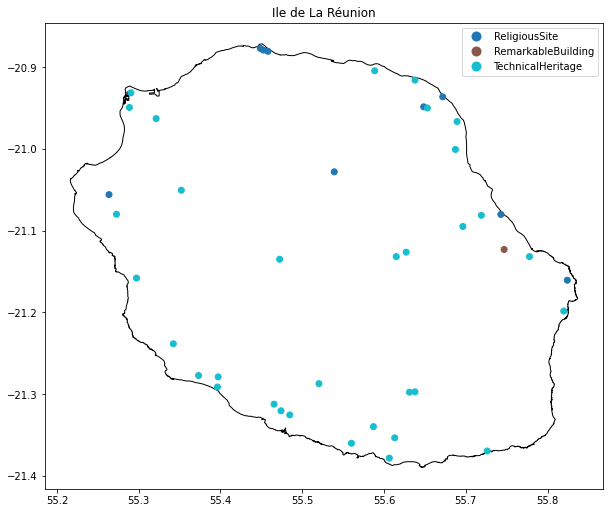

In [198]:
# Visualisation de la localisation
fig, ax = plt.subplots(figsize = (10,10))
dep[dep.code_insee == '974'].plot(ax=ax,color='white', edgecolor='black')
gdf.plot(ax=ax,column="category_1", legend=True)
ax.set_title('Ile de La Réunion')

In [110]:
%%sql
SELECT prc.Nom_du_POI, prvc.commune, prvc.code_postal, prc.Latitude "POI_Lat", prc.Longitude "POI_Long", prc.category_1
FROM poi_reunion_clean prc, poi_reunion_ville_cp prvc
WHERE prc.code_postal = prvc.code_postal
AND category_1 IN
(
  SELECT activity_name 
FROM activity_hierarchy
WHERE activity_to =
(SELECT activity_id 
FROM activity_hierarchy
WHERE activity_name = 'CulturalSite')
)
ORDER BY 3
LIMIT 5;

 * sqlite:///Itineraires.db


Nom_du_POI,commune,code_postal,POI_Lat,POI_Long,category_1
Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite
Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite
Mosquée Noor-e-Islam,Saint-Denis,97400,-20.879185,55.452474,ReligiousSite
Saga du Rhum (La),Saint-Pierre,97410,-21.312109,55.465557,TechnicalHeritage
Rhums et Punchs Isautier,Saint-Pierre,97410,-21.320276,55.474025,TechnicalHeritage


In [181]:
%%sql
result <<
SELECT prc.Nom_du_POI, prvc.commune, prvc.code_postal, prc.Latitude "POI_Lat", prc.Longitude "POI_Long", prc.category_1
FROM poi_reunion_clean prc, poi_reunion_ville_cp prvc
WHERE prc.code_postal = prvc.code_postal
AND category_1 IN
(
  SELECT activity_name 
FROM activity_hierarchy
WHERE activity_to =
(SELECT activity_id 
FROM activity_hierarchy
WHERE activity_name = 'CulturalSite')
)
ORDER BY 3
LIMIT 5;

 * sqlite:///Itineraires.db
Returning data to local variable result


In [182]:
result.csv('/content/drive/MyDrive/CSV4DB/result.csv')

CSV results at /content/drive/MyDrive/CSV4DB/result.csv

In [123]:
result = pd.read_csv('/content/drive/MyDrive/CSV4DB/result.csv')

In [124]:
gdf = gdp.GeoDataFrame(
    activity_CulturalSite_csv, geometry=gdp.points_from_xy(activity_CulturalSite_csv.POI_Long, activity_CulturalSite_csv.POI_Lat))


In [115]:
gdf.head()

,Nom_du_POI,commune,code_postal,POI_Lat,POI_Long,category_1,geometry
0,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite,POINT (55.45808 -20.88066)
1,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite,POINT (55.44879 -20.87716)
2,Mosquée Noor-e-Islam,Saint-Denis,97400,-20.879185,55.452474,ReligiousSite,POINT (55.45247 -20.87918)
3,Saga du Rhum (La),Saint-Pierre,97410,-21.312109,55.465557,TechnicalHeritage,POINT (55.46556 -21.31211)
4,Rhums et Punchs Isautier,Saint-Pierre,97410,-21.320276,55.474025,TechnicalHeritage,POINT (55.47402 -21.32028)


Text(0.5, 1.0, 'Ile de La Réunion')

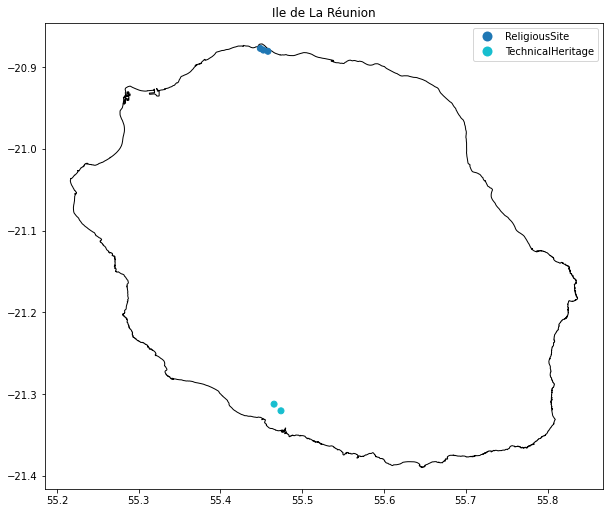

In [168]:
fig, ax = plt.subplots(figsize = (10,10))
dep[dep.nuts3 == 'FR940'].plot(ax=ax,color='white', edgecolor='black')
gdf.plot(ax=ax,column="category_1", legend=True)
ax.set_title('Ile de La Réunion')

In [ ]:
%%sql
SELECT *
FROM city_repository
LIMIT 10;

 * sqlite:///Itineraires.db


city_id,nom_commune,code_postal,Lieu_dit,gps_latitude,gps_longitude,Date_maj
1,ST DENIS,97490,BOIS DE NEFLES ST DENIS,-20.933029099,55.446977555,2023-02-11 22:31:51
2,ST DENIS,97490,ST DENIS CHAUDRON,-20.933029099,55.446977555,2023-02-11 22:31:51
3,ST DENIS,97490,LA BRETAGNE,-20.933029099,55.446977555,2023-02-11 22:31:51
4,ST DENIS,97490,MOUFIA,-20.933029099,55.446977555,2023-02-11 22:31:51
5,ST DENIS,97490,STE CLOTILDE,-20.933029099,55.446977555,2023-02-11 22:31:51
6,ST JOSEPH,97480,LES LIANES,-21.306243323,55.641977434,2023-02-11 22:31:51
7,ST JOSEPH,97480,VINCENDO,-21.306243323,55.641977434,2023-02-11 22:31:51
8,ST JOSEPH,97480,None,-21.306243323,55.641977434,2023-02-11 22:31:51
9,ST JOSEPH,97480,JEAN PETIT,-21.306243323,55.641977434,2023-02-11 22:31:51
10,ST BENOIT,97470,None,-21.091842698,55.649276452,2023-02-11 22:31:51


In [ ]:
%%sql
SELECT Nom_du_POI, Adresse_postale, commune, Description, category_0, category_1, category_2
FROM poi_reunion_activity 
WHERE category_1 ='LeisureSportActivityProvider'
LIMIT 5;


 * sqlite:///Itineraires.db


Nom_du_POI,Adresse_postale,commune,Description,category_0,category_1,category_2
Neptune (Le),"117, boulevard Hubert Delisle",Saint-Pierre,None,ActivityProvider,LeisureSportActivityProvider,None
Zen (Le),"2, rue Doret",Saint-Denis,None,ActivityProvider,LeisureSportActivityProvider,None
Varangue (La),"14, rue du Stade - Montgaillard",Saint-Denis,None,ActivityProvider,LeisureSportActivityProvider,None
Casino du Sud,"42, boulevard Hubert Delisle",Saint-Pierre,None,ActivityProvider,LeisureSportActivityProvider,None
Théâtre Vladimir Canter,15 avenue René Cassin - Campus Universitaire du Moufia,Saint-Denis,None,ActivityProvider,LeisureSportActivityProvider,None


In [ ]:
%%sql
SELECT category_1, count(category_1) 
FROM poi_reunion_2 
GROUP BY category_1
LIMIT 5;

 * sqlite:///Itineraires.db


category_1,count(category_1)
None,0
Coastline,3
Mountain,7
NaturalHeritage,18
PointOfView,13


In [ ]:
%%sql
SELECT category_2, count(category_2) 
FROM poi_reunion_2  
GROUP BY category_2
LIMIT 5;

 * sqlite:///Itineraires.db


category_2,count(category_2)
None,0
Bridge,1
Church,5
Mosque,1
Source,11


In [ ]:
%%sql
SELECT Nom_du_POI, Adresse_postale 
FROM poi_reunion_2
WHERE category_0 = 'Beach' 
AND commune = 'Saint-Leu';

 * sqlite:///Itineraires.db


Nom_du_POI,Adresse_postale
Plage Citerne 46,None
Plage de Saint-Leu,None


In [ ]:
%%sql
SELECT commune, count(commune) as nb_poi 
FROM poi_reunion_clean
GROUP BY commune
ORDER BY nb_poi DESC
LIMIT 10;

 * sqlite:///Itineraires.db


commune,nb_poi
Saint-Paul,370
Saint-Denis,302
Saint-Pierre,283
Saint-Leu,100
Saint-André,73
Le Port,63
Le Tampon,57
Saint-Benoît,51
Sainte-Marie,47
Saint-Louis,44


In [ ]:
%%sql
SELECT * 
FROM poi_reunion_food
where category_2 = 'ActivityProvider'
LIMIT 5;

 * sqlite:///Itineraires.db


index,ID,Nom_du_POI,Latitude,Longitude,Adresse_postale,Date_de_mise_a_jour,Contacts_du_POI,Description,region,commune,code_postal,category_0,category_1,category_2
2,f2a140d5-152c-300b-accb-67619012a89a,Concorde (Le),-20.89625806,55.44723605,"91 bis, allée des Topazes - Bellepierre",2019-10-10,Concorde (Le)#+33 2 62 51 51 51#info@hotel-bellepierre.com#http://www.hotel-bellepierre.com/,None,54,Saint-Denis,97400,FoodEstablishment,Restaurant,ActivityProvider
35,4543e20f-0675-3254-9506-48b083a4a84a,El Pueblo,-21.343484,55.476775,"8, boulevard Hubert Delisle",2019-10-10,El Pueblo#+33 2 62 38 56 40##,None,54,Saint-Pierre,97410,FoodEstablishment,Restaurant,ActivityProvider
36,457271d5-8321-36b2-a1ba-20ea232b0483,Artocarpe,-20.876704,55.448779,"Résidence Edouard - 9, ruelle Edouard",2021-09-28,Artocarpe#+33 2 62 21 55 48#artocarpe@orange.fr#,None,54,Saint-Denis,97400,FoodEstablishment,Restaurant,ActivityProvider
54,316dd449-7195-3841-b20d-bd33fcdfb22f,Madiana Restaurant - Bar - Tapas,-21.343185,55.467639,83 Boulevard Hubert Delisle,2019-10-10,Madiana Restaurant - Bar - Tapas#+33 6 93 13 68 79##,None,54,Saint-Pierre,97410,FoodEstablishment,Restaurant,ActivityProvider
85,708d105f-f963-3c34-8f87-4bb3b0ea6c5a,Zanzibar Café (Le),-20.8786009,55.45154099,"41, rue Pasteur",2019-10-10,Zanzibar Café (Le)#+33 2 62 20 01 18##,None,54,Saint-Denis,97400,FoodEstablishment,Restaurant,ActivityProvider


In [ ]:
%%sql
SELECT * FROM (
SELECT Nom_du_POI, Adresse_postale, "Activité1" 
FROM poi_reunion_2
WHERE commune = 'Saint-Denis' 
LIMIT 2)
UNION
SELECT * FROM (
SELECT Nom_du_POI, Adresse_postale, "Activité2" 
FROM poi_reunion_activity
where commune = 'Saint-Denis'
limit 2)
UNION
SELECT * FROM (
SELECT Nom_du_POI, Adresse_postale, "Restaurant" 
FROM poi_reunion_food
where commune = 'Saint-Denis'
limit 2)
ORDER BY 3;

 * sqlite:///Itineraires.db


Nom_du_POI,Adresse_postale,Activité1
Jardin de la Maison d'Edith (Le),"59, chemin Commins",Activité1
Musée Léon Dierx,"28, rue de Paris",Activité1
Varangue (La),"14, rue du Stade - Montgaillard",Activité2
Zen (Le),"2, rue Doret",Activité2
Concorde (Le),"91 bis, allée des Topazes - Bellepierre",Restaurant
Oasis (L'),"2, rue Doret",Restaurant
